In [1]:
from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
col_names=['Class label','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenols',
           'Proanthocyanins','Color intensity','Hue', 'OD280/OD315 of diluted wines','Proline']
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df=pd.read_csv(url, header=None , names=col_names)
df.head()


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
df.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [11]:
df['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

#Regressión logística 1vs 1 

In [12]:
#variables y vector objetivo
X= df.drop(columns='Class label')
y=df['Class label']

In [19]:
#train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.multiclass import OneVsOneClassifier


In [25]:
log_reg= LogisticRegression()

In [27]:
ovo= OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)

print('Trainig accuracy', ovo.score(X_train, y_train))
print('Testing accuracy', ovo.score(X_test, y_test))

Trainig accuracy 1.0
Testing accuracy 1.0


#Regresión Logística 1 vs all

In [30]:
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)

print('Trainig accuracy', log_reg.score(X_train, y_train))
print('Testing accuracy', log_reg.score(X_test, y_test))

Trainig accuracy 1.0
Testing accuracy 1.0


#Regresión Logística l1 Regularización

In [32]:
log_reg = LogisticRegression(penalty="l1", solver='liblinear')
log_reg.fit(X_train, y_train)

print('Trainig accuracy', log_reg.score(X_train, y_train))
print('Testing accuracy', log_reg.score(X_test, y_test))

Trainig accuracy 1.0
Testing accuracy 1.0


#Regresión Logística l2 Regularización

In [33]:
log_reg = LogisticRegression(penalty="l2")
log_reg.fit(X_train, y_train)

print('Trainig accuracy', log_reg.score(X_train, y_train))
print('Testing accuracy', log_reg.score(X_test, y_test))

Trainig accuracy 1.0
Testing accuracy 1.0


#KNN


In [35]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
print('Trainig accuracy', knn.score(X_train, y_train))
print('Testing accuracy', knn.score(X_test, y_test))

Trainig accuracy 0.9774436090225563
Testing accuracy 0.9333333333333333


#Bagged Tree

In [36]:
bt =BaggingClassifier()
bt.fit(X_train, y_train)
print('Trainig accuracy', bt.score(X_train, y_train))
print('Testing accuracy', bt.score(X_test, y_test))

Trainig accuracy 0.9849624060150376
Testing accuracy 0.9111111111111111


#Random forest

In [37]:
rf =RandomForestClassifier()
rf.fit(X_train, y_train)
print('Trainig accuracy', rf.score(X_train, y_train))
print('Testing accuracy', rf.score(X_test, y_test))

Trainig accuracy 1.0
Testing accuracy 1.0


In [ ]:
#¿Qué modelo funcionó mejor?---todos los modelos, ya que obtuvieron un score del 100%
#¿Cuáles son las características más importantes de tus modelos? ¿Hay algún modelo que te haya gustado más y por qué?---

In [38]:
log_reg.coef_

array([[ 0.74539561,  0.2363885 ,  0.40275182, -0.80963928,  0.11325046,
         0.21682046,  0.68847726, -0.16066412,  0.19762057,  0.12939474,
         0.17896367,  0.54545911,  1.03500888],
       [-0.92636931, -0.42557442, -0.77942759,  0.55624032, -0.15395045,
         0.10728785,  0.3284713 ,  0.11195258,  0.1768698 , -0.90258146,
         0.56633642,  0.16894365, -1.17585308],
       [ 0.1809737 ,  0.18918592,  0.37667577,  0.25339896,  0.04069998,
        -0.32410831, -1.01694856,  0.04871154, -0.37449037,  0.77318672,
        -0.74530008, -0.71440276,  0.14084419]])

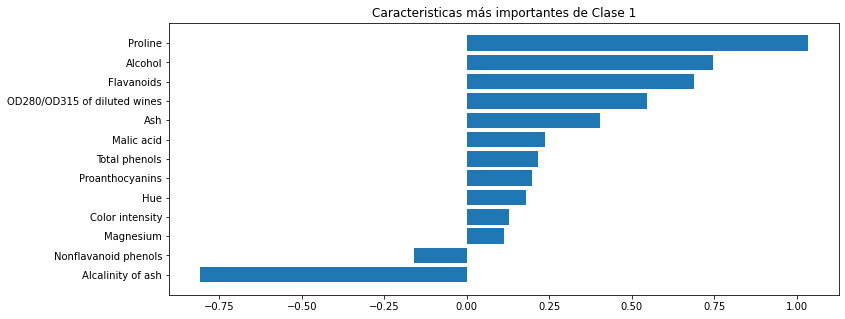

In [40]:
coef_wn = pd.DataFrame(zip(X.columns, log_reg.coef_[0]), columns = ['Feature', 'Coef'])
coef_wn.sort_values(by = 'Coef', inplace = True)
plt.figure(figsize = (12, 5))
plt.barh(coef_wn['Feature'], coef_wn['Coef'])
plt.title('Caracteristicas más importantes de Clase 1');

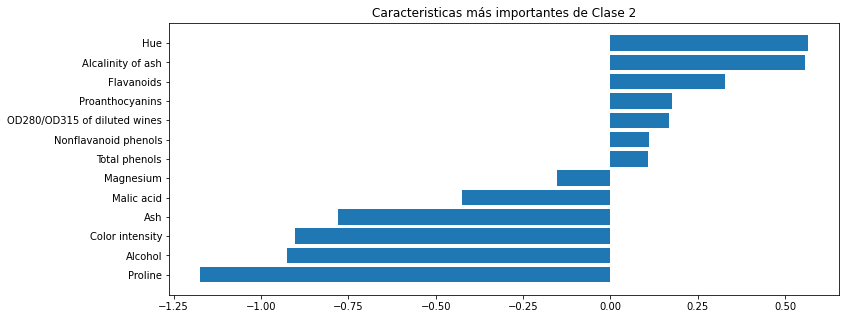

In [41]:
coef_wn = pd.DataFrame(zip(X.columns, log_reg.coef_[1]), columns = ['Feature', 'Coef'])
coef_wn.sort_values(by = 'Coef', inplace = True)
plt.figure(figsize = (12, 5))
plt.barh(coef_wn['Feature'], coef_wn['Coef'])
plt.title('Caracteristicas más importantes de Clase 2');

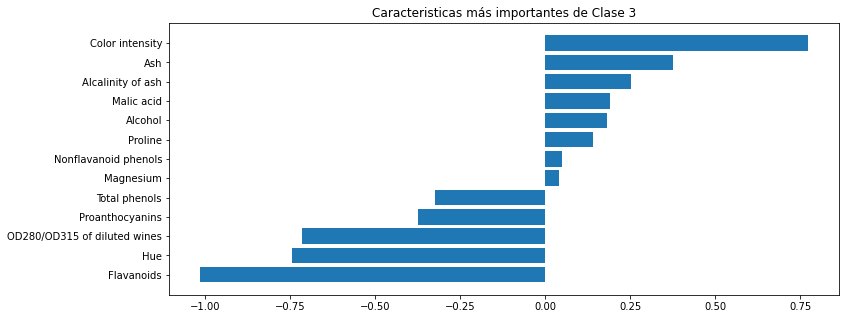

In [42]:
coef_wn = pd.DataFrame(zip(X.columns, log_reg.coef_[2]), columns = ['Feature', 'Coef'])
coef_wn.sort_values(by = 'Coef', inplace = True)
plt.figure(figsize = (12, 5))
plt.barh(coef_wn['Feature'], coef_wn['Coef'])
plt.title('Caracteristicas más importantes de Clase 3');